# RBM Example with scikit-learn

This notebook trains a **Bernoulli RBM** (pre‑implemented             in scikit‑learn) on a toy data‑set where **exactly             one of 20 spins is “up”** in every training sample.\
After training we draw fantasies from the model and check that the relative             frequency of each visible unit is close to the theoretical $p(v_i=1)=\tfrac1{20}=0.05$.


In [1]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt
np.random.seed(0)

## 1. Create the training set

In [2]:
n_visible = 20
n_samples = 10_000

train_X = np.zeros((n_samples, n_visible), dtype=np.float32)
chosen = np.random.randint(0, n_visible, size=n_samples)
train_X[np.arange(n_samples), chosen] = 1

print('Shape:', train_X.shape)
print(train_X[:5])

Shape: (10000, 20)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 2. Fit the BernoulliRBM

In [3]:
rbm = BernoulliRBM(n_components=50,
                    learning_rate=0.01,
                    batch_size=100,
                    n_iter=50,
                    verbose=True,
                    random_state=0)

rbm.fit(train_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -45.39, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -54.80, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -58.76, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -60.48, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -61.02, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -61.49, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -61.69, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -61.86, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -61.70, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -61.89, time = 0.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -61.73, time = 0.04s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -61.81, time = 0.02s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -61.95, time = 0.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -61.77, time = 0.03s
[BernoulliRBM] Iteration 15, 

BernoulliRBM(batch_size=100, learning_rate=0.01, n_components=50, n_iter=50,
             random_state=0, verbose=True)

## 3. Draw fantasies

In [4]:
def sample_rbm(rbm, n_fantasy=10_000, n_gibbs=200):
    v = np.random.rand(n_fantasy, rbm.n_features_in_) > 0.5
    for _ in range(n_gibbs):
        v = rbm.gibbs(v)
    return v.astype(int)

fantasy = sample_rbm(rbm)
rel_freq = fantasy.mean(0)
print(rel_freq)

[0.0523 0.0566 0.0485 0.056  0.0514 0.0565 0.0536 0.0501 0.0552 0.055
 0.0497 0.0544 0.0487 0.0497 0.0557 0.0548 0.0489 0.0536 0.0544 0.0478]


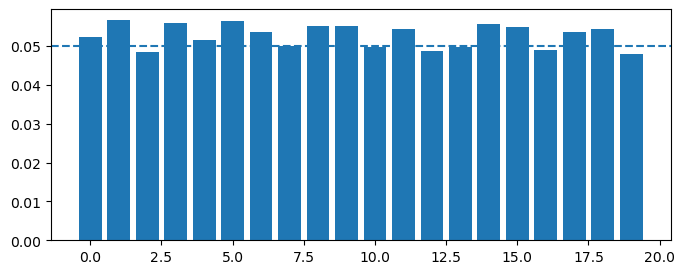

In [5]:
plt.figure(figsize=(8,3))
plt.bar(np.arange(n_visible), rel_freq)
plt.axhline(1/20, ls='--')
plt.show()